#Importing Datasets and libraries

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [7]:
df= pd.read_csv("/content/drive/MyDrive/MY DATASET/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#How the data points are scattered

Pairwise Scatterplots

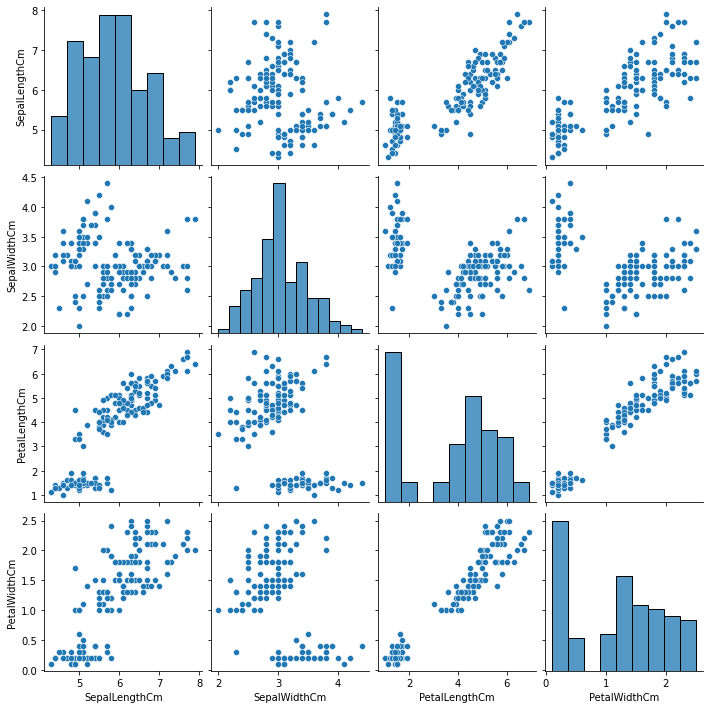

In [9]:
data=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
sns.pairplot(data)
plt.show()

#Elbow Method to find optimum number of cluster

In [11]:
SS_dist=[]
R = range(1,15)
for i in R:
  km = KMeans(n_clusters=i)
  km = km.fit(data)
  SS_dist.append(km.inertia_)

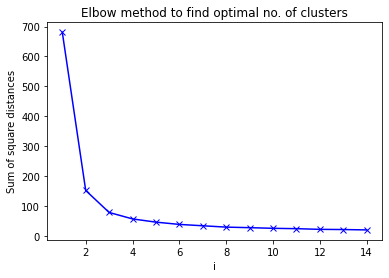

In [12]:
plt.plot(R, SS_dist, 'bx-')
plt.xlabel('i')
plt.ylabel('Sum of square distances')
plt.title('Elbow method to find optimal no. of clusters')
plt.show()

INFERENCE : After i=3 the change in the slope is linear. So the optimum no of cluster is 3.

#Fitting KMeans model with 3 clusters

In [15]:
km3 = KMeans(n_clusters=3)
km3 = km3.fit(data)

In [16]:
print(km3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


#How Many Observations are in Each cluster :

In [17]:
result=km3.labels_
result=pd.DataFrame(result, columns=['cluster'])
result.groupby('cluster').size()

cluster
0    50
1    62
2    38
dtype: int64

The Centroid of Clusters :

In [18]:
centroids = km3.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Centroids_SepalLengthCm','Centroids_SepalWidthCm','Centroids_PetalLengthCm','Centroids_PetalWidthCm'])
centroids

,Centroids_SepalLengthCm,Centroids_SepalWidthCm,Centroids_PetalLengthCm,Centroids_PetalWidthCm
0,5.006000,3.418000,1.464000,0.244000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


#Visualisation of the clusters or each pair of input

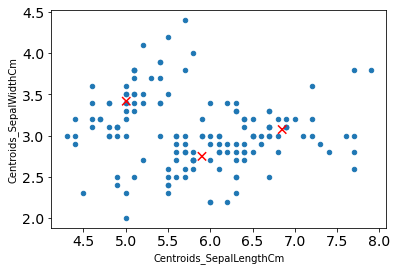

In [19]:
s1=data.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
centroids.plot(ax=s1, kind='scatter', x='Centroids_SepalLengthCm', y='Centroids_SepalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

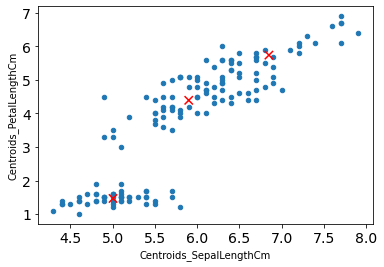

In [20]:
s2=data.plot(kind='scatter', x='SepalLengthCm', y='PetalLengthCm')
centroids.plot(ax=s2, kind='scatter', x='Centroids_SepalLengthCm', y='Centroids_PetalLengthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

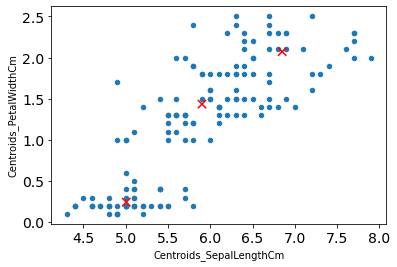

In [21]:
s3=data.plot(kind='scatter', x='SepalLengthCm', y='PetalWidthCm')
centroids.plot(ax=s3, kind='scatter', x='Centroids_SepalLengthCm', y='Centroids_PetalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

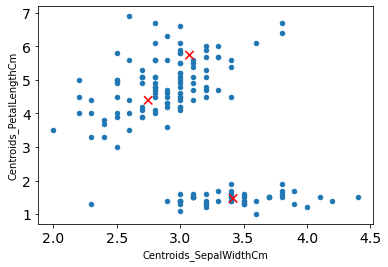

In [22]:
s4=data.plot(kind='scatter', x='SepalWidthCm', y='PetalLengthCm')
centroids.plot(ax=s4, kind='scatter', x='Centroids_SepalWidthCm', y='Centroids_PetalLengthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

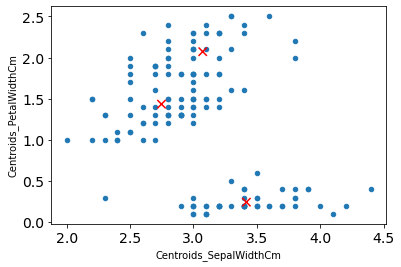

In [23]:
s5=data.plot(kind='scatter', x='SepalWidthCm', y='PetalWidthCm')
centroids.plot(ax=s5, kind='scatter', x='Centroids_SepalWidthCm', y='Centroids_PetalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

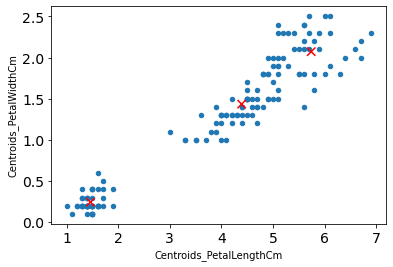

In [24]:
s6=data.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm')
centroids.plot(ax=s6, kind='scatter', x='Centroids_PetalLengthCm', y='Centroids_PetalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()